# Klasterisasi dengan Jarak Euclidean

Notebook ini menghitung jarak Euclidean antara titik data dan pusat klaster, kemudian menentukan keanggotaan klaster berdasarkan jarak yang lebih kecil. Hasilnya divisualisasikan dalam bentuk tabel dan grafik scatter plot.

## Step 1: Import Library
Kita akan menggunakan library `numpy`, `pandas`, dan `matplotlib` untuk menghitung jarak, menyimpan hasil, dan memvisualisasikan data.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Step 2: Definisikan Titik Data dan Pusat Klaster
Titik data dan pusat klaster akan diinput sebagai koordinat dalam bentuk dictionary dan tuple.

In [2]:

# Data Titik
data_points = {
    "M1": (1, 4.5),
    "M2": (3, 6.5),
    "M3": (4, 4.5),
    "M4": (7.5, 3.2),
    "M5": (6, 2.3),
    "M6": (2.5, 3.8),
    "M7": (5, 5.5),
}

# Pusat Klaster
C1 = (3, 4)
C2 = (6, 4)


## Step 3: Hitung Jarak dan Tentukan Klaster
Fungsi untuk menghitung jarak Euclidean akan diterapkan pada setiap titik data. Setiap titik akan dimasukkan ke klaster dengan jarak terpendek.

In [3]:

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(point, center):
    return np.sqrt((point[0] - center[0]) ** 2 + (point[1] - center[1]) ** 2)

# Menghitung jarak dan menentukan klaster
results = []
for key, point in data_points.items():
    d1 = euclidean_distance(point, C1)
    d2 = euclidean_distance(point, C2)
    cluster = "C1" if d1 < d2 else "C2"
    results.append({"Point": key, "Coordinates": point, "Distance to C1": d1, "Distance to C2": d2, "Cluster": cluster})

# Membuat tabel hasil
df_results = pd.DataFrame(results)
df_results


,Point,Coordinates,Distance to C1,Distance to C2,Cluster
0,M1,"(1, 4.5)",2.061553,5.024938,C1
1,M2,"(3, 6.5)",2.500000,3.905125,C1
2,M3,"(4, 4.5)",1.118034,2.061553,C1
3,M4,"(7.5, 3.2)",4.570558,1.700000,C2
4,M5,"(6, 2.3)",3.448188,1.700000,C2
5,M6,"(2.5, 3.8)",0.538516,3.505710,C1
6,M7,"(5, 5.5)",2.500000,1.802776,C2


## Step 4: Visualisasi Klasterisasi
Grafik scatter plot menunjukkan distribusi titik data berdasarkan klaster dan pusat klaster.

<ipython-input-4-b44187803fb5>:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(C1[0], C1[1], color="red", marker="x", s=200, label="C1 (Center)", edgecolor='k')
<ipython-input-4-b44187803fb5>:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(C2[0], C2[1], color="green", marker="x", s=200, label="C2 (Center)", edgecolor='k')


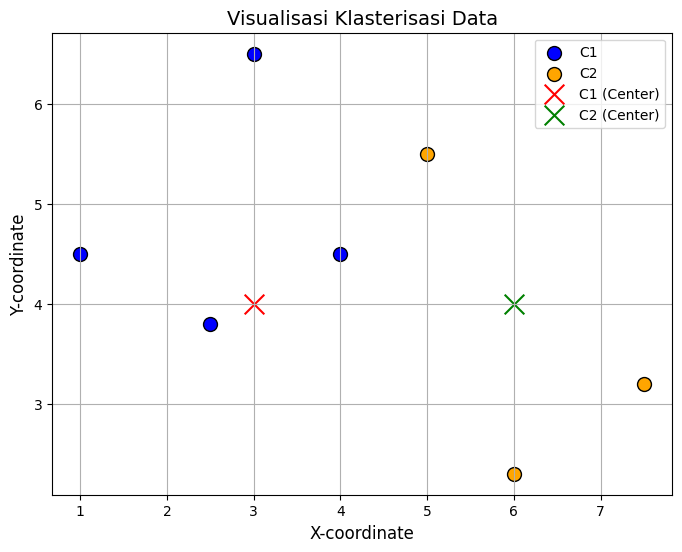

In [4]:

# Warna untuk setiap klaster
colors = {"C1": "blue", "C2": "orange"}

# Visualisasi data
plt.figure(figsize=(8, 6))
for idx, row in df_results.iterrows():
    plt.scatter(row['Coordinates'][0], row['Coordinates'][1],
                color=colors[row['Cluster']], label=row['Cluster'] if row['Cluster'] not in plt.gca().get_legend_handles_labels()[1] else "",
                s=100, edgecolor='k')

# Plot pusat klaster
plt.scatter(C1[0], C1[1], color="red", marker="x", s=200, label="C1 (Center)", edgecolor='k')
plt.scatter(C2[0], C2[1], color="green", marker="x", s=200, label="C2 (Center)", edgecolor='k')

# Labeling
plt.title("Visualisasi Klasterisasi Data", fontsize=14)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
